In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa
from   statsmodels.tsa.stattools import acf, pacf

%matplotlib inline

In [2]:
n = 600
ar = np.r_[1, -0.6]
ma = np.r_[1, 0]
ar1 = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)

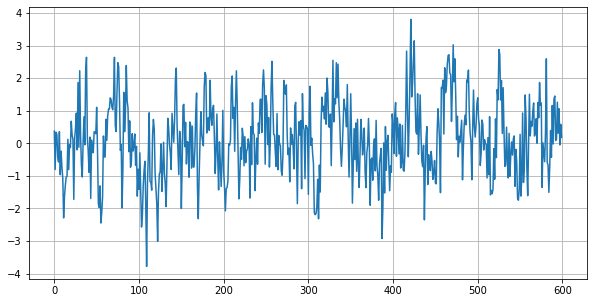

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(ar1);
plt.grid(True)

In [4]:
ar1_acf, acf_ci = acf(ar1, alpha=0.05)
ar1_pacf, pacf_ci = pacf(ar1, alpha=0.05)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


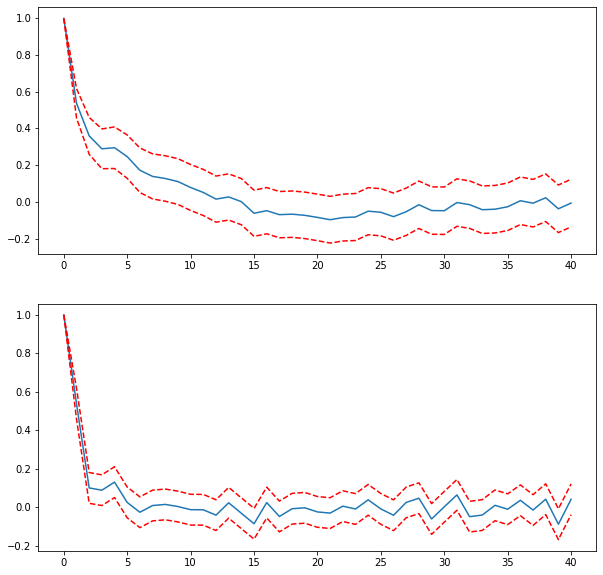

In [5]:
plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.plot(ar1_acf)
plt.plot(acf_ci, 'r--')
plt.subplot(212)
plt.plot(pacf(ar1))
plt.plot(pacf_ci, 'r--');

In [6]:
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None

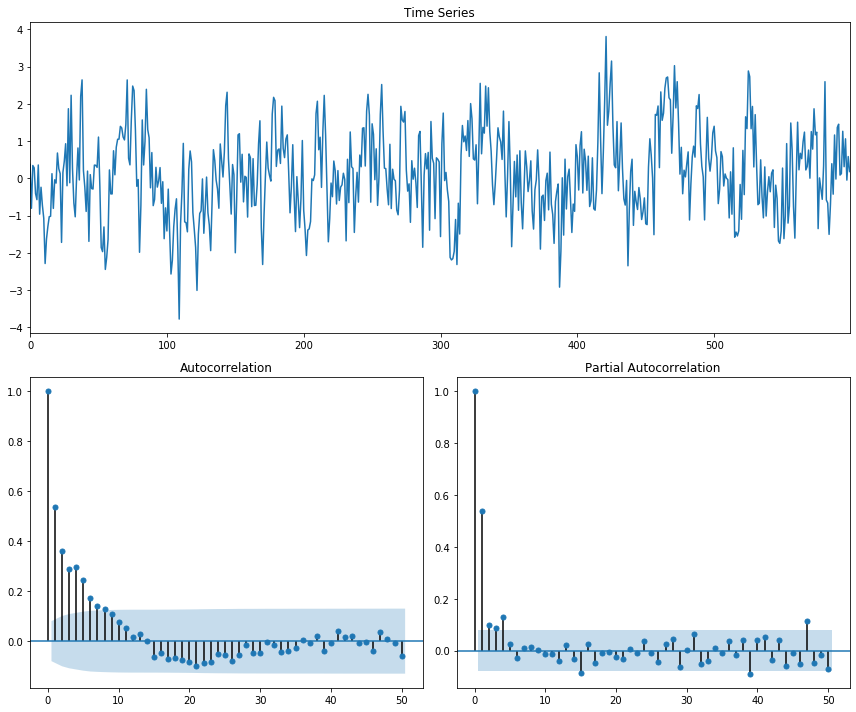

In [7]:
plotds(ar1)

In [14]:
# AR(2)
ar = np.r_[1, 0.6, 0.7]
ma = np.r_[1, 0]
ar2 = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)

ar = np.r_[ar, 0.5]
ar3 = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)

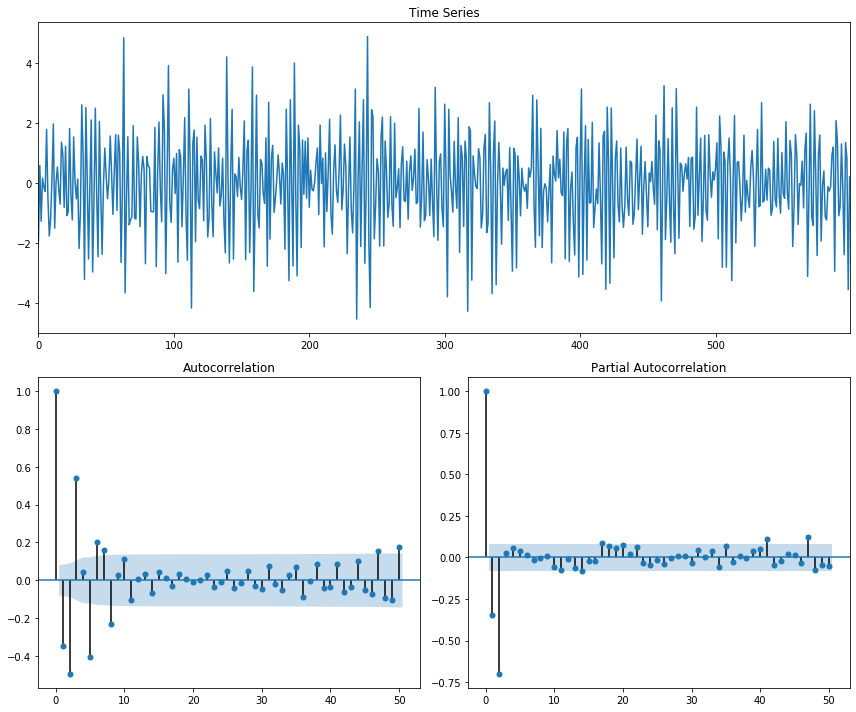

In [15]:
plotds(ar2)

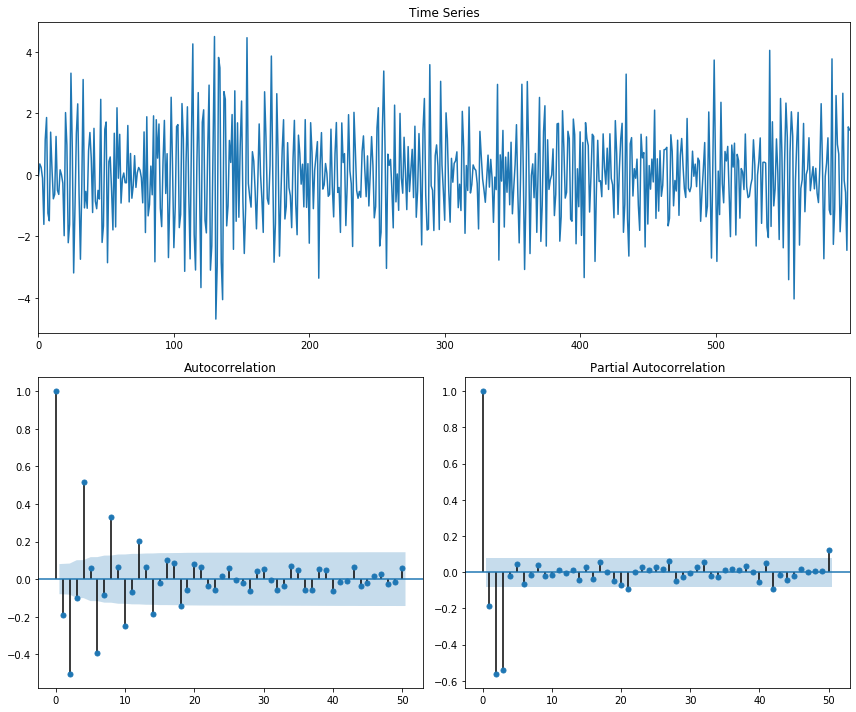

In [16]:
plotds(ar3)

In [17]:
ar1mod = smtsa.ARMA(ar1.tolist(), order=(1, 0))
ar1_fit = ar1mod.fit(maxlag=30, method='mle', trend='nc')
ar1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 0)   Log Likelihood                -833.796
Method:                           mle   S.D. of innovations              0.971
Date:                Tue, 07 Jan 2020   AIC                           1671.591
Time:                        09:49:00   BIC                           1680.385
Sample:                             0   HQIC                          1675.015
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.5422      0.034     15.839      0.000       0.475       0.609
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8444           +0.0000j            1.8444            0.0000
-----------------------------------------------------------------------------
"""

In [19]:
ar2mod = smtsa.ARMA(ar2.tolist(), order=(2, 0))
ar2_fit = ar2mod.fit(maxlag=30, method='mle', trend='nc')
ar2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(2, 0)   Log Likelihood                -883.190
Method:                           mle   S.D. of innovations              1.053
Date:                Tue, 07 Jan 2020   AIC                           1772.379
Time:                        09:50:38   BIC                           1785.570
Sample:                             0   HQIC                          1777.514
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.5883      0.029    -20.162      0.000      -0.646      -0.531
ar.L2.y       -0.7018      0.029    -24.046      0.000      -0.759      -0.645
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4192           -1.1177j            1.1937           -0.3071
AR.2           -0.4192           +1.1177j            1.1937            0.3071
-----------------------------------------------------------------------------
"""

In [21]:
ar3mod = smtsa.ARMA(ar3.tolist(), order=(3, 0))
ar3_fit = ar3mod.fit(maxlag=30, method='mle', trend='nc')
ar3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(3, 0)   Log Likelihood                -868.005
Method:                           mle   S.D. of innovations              1.027
Date:                Tue, 07 Jan 2020   AIC                           1744.010
Time:                        09:53:20   BIC                           1761.598
Sample:                             0   HQIC                          1750.857
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.5989      0.034    -17.458      0.000      -0.666      -0.532
ar.L2.y       -0.7199      0.030    -23.907      0.000      -0.779      -0.661
ar.L3.y       -0.5404      0.034    -15.770      0.000      -0.608      -0.473
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0583           -1.1287j            1.1302           -0.2418
AR.2            0.0583           +1.1287j            1.1302            0.2418
AR.3           -1.4487           -0.0000j            1.4487           -0.5000
-----------------------------------------------------------------------------
"""